<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/5%EC%9E%A5.%20%EC%84%9C%ED%8F%AC%ED%8A%B8%20%EB%B2%A1%ED%84%B0%20%EB%A8%B8%EC%8B%A0/1.%20%EC%84%A0%ED%98%95%20SVM%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 선형 SVM 분류
하드 마진 : 완전히 분리 <br/>
소프트 마진 : 오차를 허용하여 분리 <br/>
sklearn LinearSVC는 소프트 마진임.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [15]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


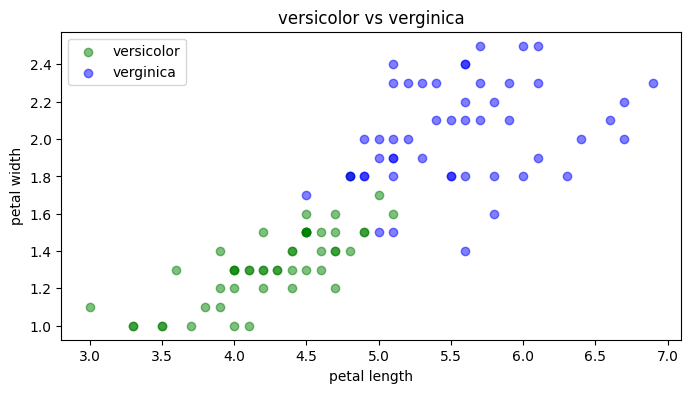

In [41]:
# petal length와 petal width만 비교해서 시각화.
plt.figure(figsize=(8, 4))
plt.scatter(x=iris_df[iris_df['target'] == 1]['petal length (cm)'], y=iris_df[iris_df['target'] == 1]['petal width (cm)'], c='g', alpha=0.5, label='versicolor')
plt.scatter(x=iris_df[iris_df['target'] == 2]['petal length (cm)'], y=iris_df[iris_df['target'] == 2]['petal width (cm)'], c='b', alpha=0.5, label='verginica')
plt.legend()
plt.title('versicolor vs verginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [46]:
# SVM 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있음.
# C와 도로는 반비례.
svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)

X = iris_df.iloc[:, 2:4]
y = iris_df['target']==2
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [48]:
X_new = [
         [5.5, 1.7],
         [5.0, 1.5]
]

svm_clf.predict(X_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ True, False])